In [218]:
import cv2
import matplotlib.pyplot as plt


In [229]:
img = cv2.imread("input/sudoku3.png")
Grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blured = cv2.GaussianBlur(Grayimg, (7,7), 3)

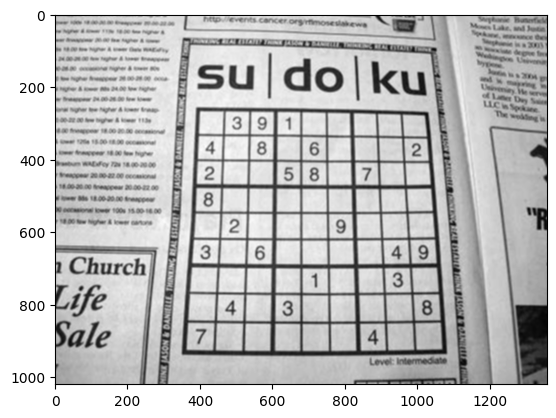

In [230]:
plt.imshow(img_blured, cmap = "gray")

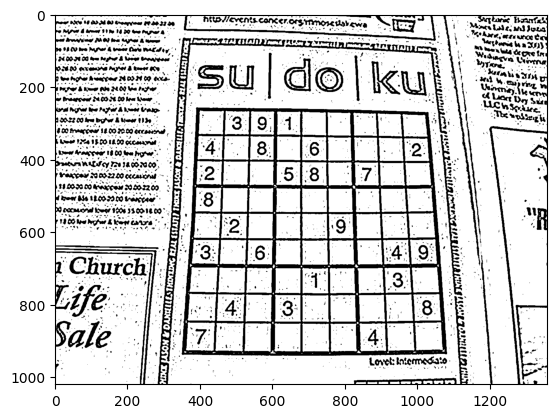

In [231]:
thresh = cv2.adaptiveThreshold(img_blured,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
plt.imshow(thresh , cmap="gray")


In [232]:
thresh = cv2.bitwise_not(thresh)

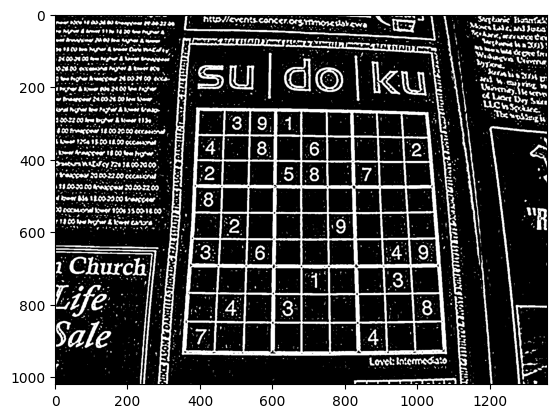

In [233]:
plt.imshow(thresh, cmap="gray")

In [234]:
contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0]

In [235]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)


In [236]:
Sudoku_contour = None
for contour in contours:
    epsilon = 0.02 * (cv2.arcLength(contour, True))
    approx = cv2.approxPolyDP(contour, epsilon , True)
    if len(approx) == 4 : 
        Sudoku_contour = approx
        break
if Sudoku_contour is None:
    print("Not Found!")
    
        

In [237]:
result = cv2.drawContours(img, [Sudoku_contour], -1 , (0,255,0), 20)

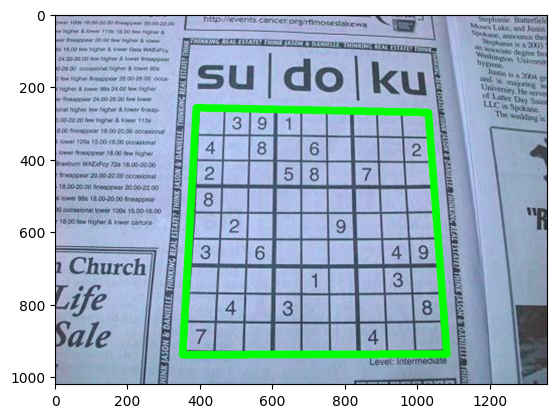

In [238]:
plt.imshow(result)